In [9]:
"""
INTRODUCCIÓN A KERAS - API DE ALTO NIVEL PARA TENSORFLOW
======================================================

Objetivos:
- Aprender los conceptos básicos de Keras
- Utilizar la API de alto nivel de TensorFlow
- Comparar modelo secuencial vs API funcional
- Implementar regresión logística y redes neuronales
- Entender Keras como wrapper de TensorFlow

Sprint: Transición a APIs de Alto Nivel para Deep Learning
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("="*80)
print("INTRODUCCIÓN A KERAS - API DE ALTO NIVEL")
print("De TensorFlow de bajo nivel a Keras simplificado")
print("="*80)

# Verificar versiones
print(f"🔧 TensorFlow versión: {tf.__version__}")
print(f"🧠 Keras versión: {keras.__version__}")

# Configurar semilla para reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)


INTRODUCCIÓN A KERAS - API DE ALTO NIVEL
De TensorFlow de bajo nivel a Keras simplificado
🔧 TensorFlow versión: 2.13.0


AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'


📚 1. ¿QUÉ ES KERAS?

🧠 KERAS - CONCEPTOS FUNDAMENTALES:
──────────────────────────────────

🔧 DEFINICIÓN:
   • API de alto nivel para deep learning
   • Wrapper que simplifica TensorFlow
   • Diseñado para experimentación rápida
   • Interfaz user-friendly e intuitiva

🎯 VENTAJAS PRINCIPALES:

   📈 PRODUCTIVIDAD:
      • Código más conciso y legible
      • Prototipado rápido de modelos
      • Menos líneas de código
      • Debugging más fácil

   🔄 FLEXIBILIDAD:
      • Múltiples backends (TensorFlow, Theano)
      • APIs diferentes según necesidad
      • Extensible y modular
      • Compatible con TensorFlow nativo

   🎓 FACILIDAD DE USO:
      • Curva de aprendizaje suave
      • Documentación excelente
      • Comunidad activa
      • Abstracciones intuitivas

🏗️ ARQUITECTURAS DISPONIBLES:
   • Modelo Secuencial → Para modelos lineales
   • API Funcional → Para modelos complejos
   • Subclassing → Para máximo control

💡 WRAPPER CONCEPT:
   Keras encapsula la complejidad de Tenso

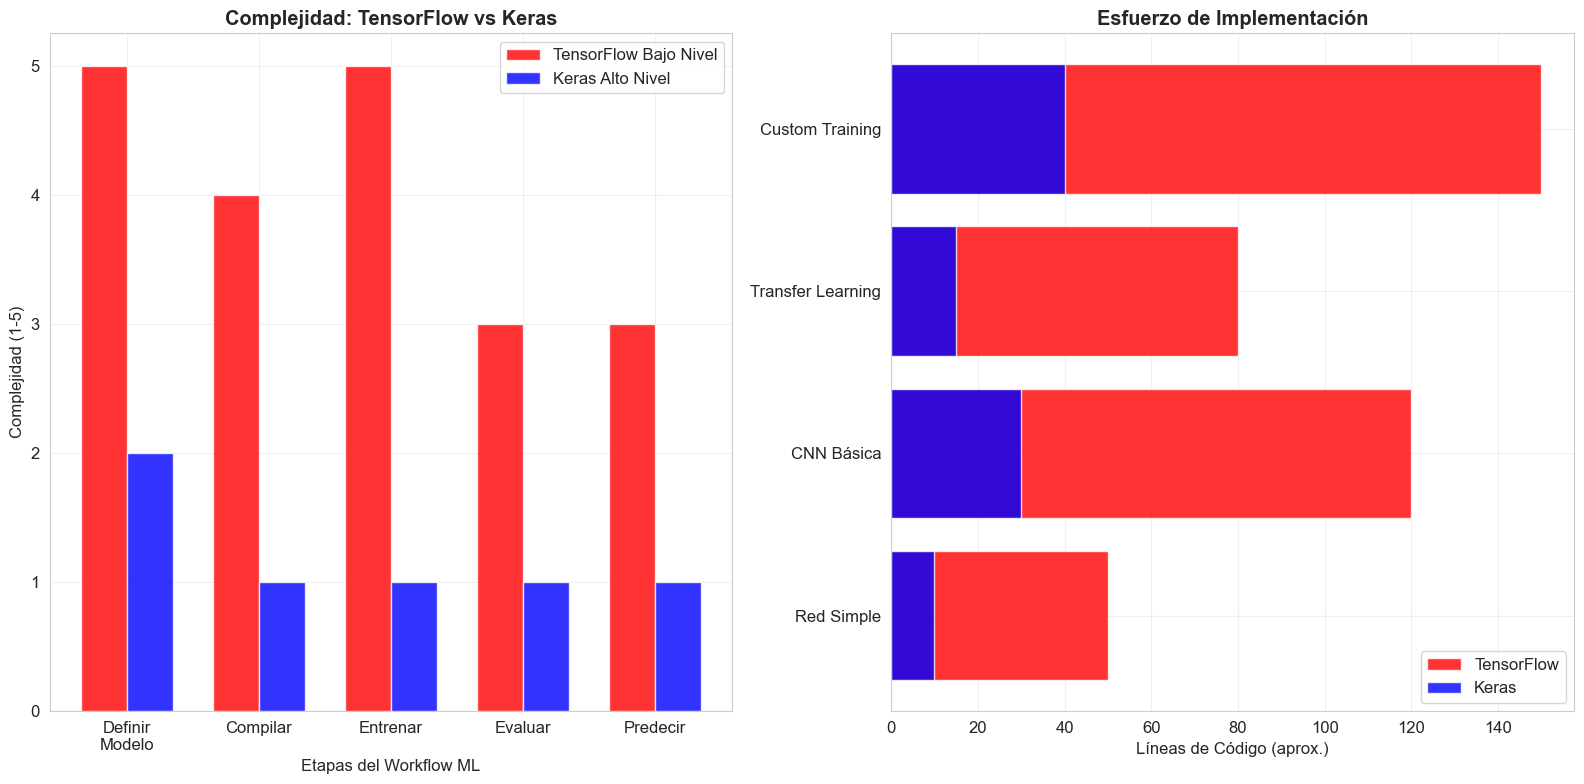

✅ Conceptos fundamentales de Keras establecidos


In [10]:
# ============================================================================
# 1. ¿QUÉ ES KERAS?
# ============================================================================

print("\n📚 1. ¿QUÉ ES KERAS?")
print("="*25)

print("""
🧠 KERAS - CONCEPTOS FUNDAMENTALES:
──────────────────────────────────

🔧 DEFINICIÓN:
   • API de alto nivel para deep learning
   • Wrapper que simplifica TensorFlow
   • Diseñado para experimentación rápida
   • Interfaz user-friendly e intuitiva

🎯 VENTAJAS PRINCIPALES:

   📈 PRODUCTIVIDAD:
      • Código más conciso y legible
      • Prototipado rápido de modelos
      • Menos líneas de código
      • Debugging más fácil

   🔄 FLEXIBILIDAD:
      • Múltiples backends (TensorFlow, Theano)
      • APIs diferentes según necesidad
      • Extensible y modular
      • Compatible con TensorFlow nativo

   🎓 FACILIDAD DE USO:
      • Curva de aprendizaje suave
      • Documentación excelente
      • Comunidad activa
      • Abstracciones intuitivas

🏗️ ARQUITECTURAS DISPONIBLES:
   • Modelo Secuencial → Para modelos lineales
   • API Funcional → Para modelos complejos
   • Subclassing → Para máximo control

💡 WRAPPER CONCEPT:
   Keras encapsula la complejidad de TensorFlow,
   exponiendo solo la funcionalidad necesaria
   para la mayoría de casos de uso.
""")

# Comparación visual API de alto vs bajo nivel
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Complejidad de implementación
levels = ['Definir\nModelo', 'Compilar', 'Entrenar', 'Evaluar', 'Predecir']
tensorflow_complexity = [5, 4, 5, 3, 3]  # Escala 1-5
keras_complexity = [2, 1, 1, 1, 1]

x_pos = np.arange(len(levels))
width = 0.35

bars1 = axes[0].bar(x_pos - width/2, tensorflow_complexity, width, 
                   label='TensorFlow Bajo Nivel', alpha=0.8, color='red')
bars2 = axes[0].bar(x_pos + width/2, keras_complexity, width, 
                   label='Keras Alto Nivel', alpha=0.8, color='blue')

axes[0].set_xlabel('Etapas del Workflow ML')
axes[0].set_ylabel('Complejidad (1-5)')
axes[0].set_title('Complejidad: TensorFlow vs Keras', fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(levels)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Líneas de código estimadas
tasks = ['Red Simple', 'CNN Básica', 'Transfer Learning', 'Custom Training']
tf_lines = [50, 120, 80, 150]
keras_lines = [10, 30, 15, 40]

axes[1].barh(tasks, tf_lines, alpha=0.8, color='red', label='TensorFlow')
axes[1].barh(tasks, keras_lines, alpha=0.8, color='blue', label='Keras')
axes[1].set_xlabel('Líneas de Código (aprox.)')
axes[1].set_title('Esfuerzo de Implementación', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Conceptos fundamentales de Keras establecidos")



⚡ 2. PREPARACIÓN DE DATOS - COMPUERTA AND
🔬 PROBLEMA: IMPLEMENTAR COMPUERTA AND CON REGRESIÓN LOGÍSTICA

📊 DATASET COMPUERTA AND:
   • Entrada shape: (4, 2)
   • Salida shape: (4, 1)
   • Tipo de problema: Clasificación binaria

📋 TABLA DE VERDAD AND:
   Input 1 | Input 2 | Output
   --------|---------|-------
      0    |    0    |   0
      0    |    1    |   0
      1    |    0    |   0
      1    |    1    |   1


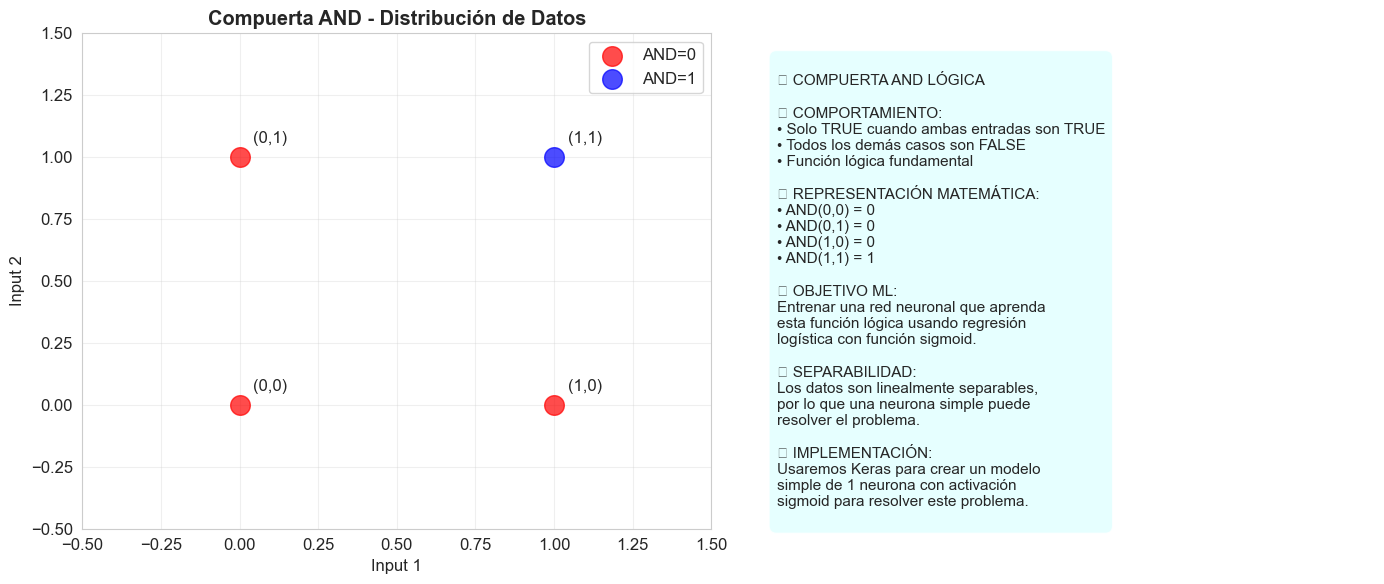

✅ Datos de la compuerta AND preparados


In [11]:
# ============================================================================
# 2. PREPARACIÓN DE DATOS - COMPUERTA AND (CORREGIDO)
# ============================================================================

print("\n⚡ 2. PREPARACIÓN DE DATOS - COMPUERTA AND")
print("="*45)

print("🔬 PROBLEMA: IMPLEMENTAR COMPUERTA AND CON REGRESIÓN LOGÍSTICA")

# Datos de entrenamiento para la compuerta AND
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_train = np.array([[0], [0], [0], [1]], dtype=np.float32)

print(f"\n📊 DATASET COMPUERTA AND:")
print(f"   • Entrada shape: {x_train.shape}")
print(f"   • Salida shape: {y_train.shape}")
print(f"   • Tipo de problema: Clasificación binaria")

print(f"\n📋 TABLA DE VERDAD AND:")
print("   Input 1 | Input 2 | Output")
print("   --------|---------|-------")
for i, (inputs, output) in enumerate(zip(x_train, y_train)):
    print(f"      {inputs[0]:.0f}    |    {inputs[1]:.0f}    |   {output[0]:.0f}")

# Visualización de los datos (CORREGIDA)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot de los datos - VERSIÓN CORREGIDA
colors = ['red' if y[0] == 0 else 'blue' for y in y_train]
labels = ['AND=0' if y[0] == 0 else 'AND=1' for y in y_train]

# Agregar puntos con etiquetas únicas
plotted_labels = set()
for i, (x, y, color, label) in enumerate(zip(x_train, y_train, colors, labels)):
    if label not in plotted_labels:
        axes[0].scatter(x[0], x[1], c=color, s=200, alpha=0.7, label=label)
        plotted_labels.add(label)
    else:
        axes[0].scatter(x[0], x[1], c=color, s=200, alpha=0.7)
    
    axes[0].annotate(f'({x[0]:.0f},{x[1]:.0f})', (x[0], x[1]), 
                    xytext=(10, 10), textcoords='offset points', fontsize=12)

axes[0].set_xlabel('Input 1')
axes[0].set_ylabel('Input 2')
axes[0].set_title('Compuerta AND - Distribución de Datos', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-0.5, 1.5)
axes[0].set_ylim(-0.5, 1.5)

# Representación de la función AND
axes[1].axis('off')
and_explanation = """
⚡ COMPUERTA AND LÓGICA

🔍 COMPORTAMIENTO:
• Solo TRUE cuando ambas entradas son TRUE
• Todos los demás casos son FALSE
• Función lógica fundamental

🧮 REPRESENTACIÓN MATEMÁTICA:
• AND(0,0) = 0
• AND(0,1) = 0  
• AND(1,0) = 0
• AND(1,1) = 1

🎯 OBJETIVO ML:
Entrenar una red neuronal que aprenda
esta función lógica usando regresión
logística con función sigmoid.

📐 SEPARABILIDAD:
Los datos son linealmente separables,
por lo que una neurona simple puede
resolver el problema.

🔧 IMPLEMENTACIÓN:
Usaremos Keras para crear un modelo
simple de 1 neurona con activación
sigmoid para resolver este problema.
"""

axes[1].text(0.05, 0.95, and_explanation, transform=axes[1].transAxes,
            fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcyan', alpha=0.8))

plt.tight_layout()
plt.show()

print("✅ Datos de la compuerta AND preparados")



🔗 3. MODELO SECUENCIAL - REGRESIÓN LOGÍSTICA
🏗️ IMPLEMENTACIÓN CON KERAS MODELO SECUENCIAL:

📋 MÉTODO 1: CONSTRUCTOR SECUENCIAL
   ✅ Modelo creado con constructor Sequential

📊 RESUMEN DEL MODELO:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

⚙️ COMPILANDO MODELO:
   • Loss: binary_crossentropy (clasificación binaria)
   • Optimizer: Adam (lr=0.01)
   • Metrics: accuracy

🏋️ ENTRENANDO MODELO SECUENCIAL:
   ✅ Entrenamiento completado: 1000 épocas

📊 EVALUANDO MODELO:
   • Probabilidades predichas: [0.00292918 0.11354246 0.11211536 0.84628135]
   • Predicciones binarias: [0 0 0 1]
   • Etiq

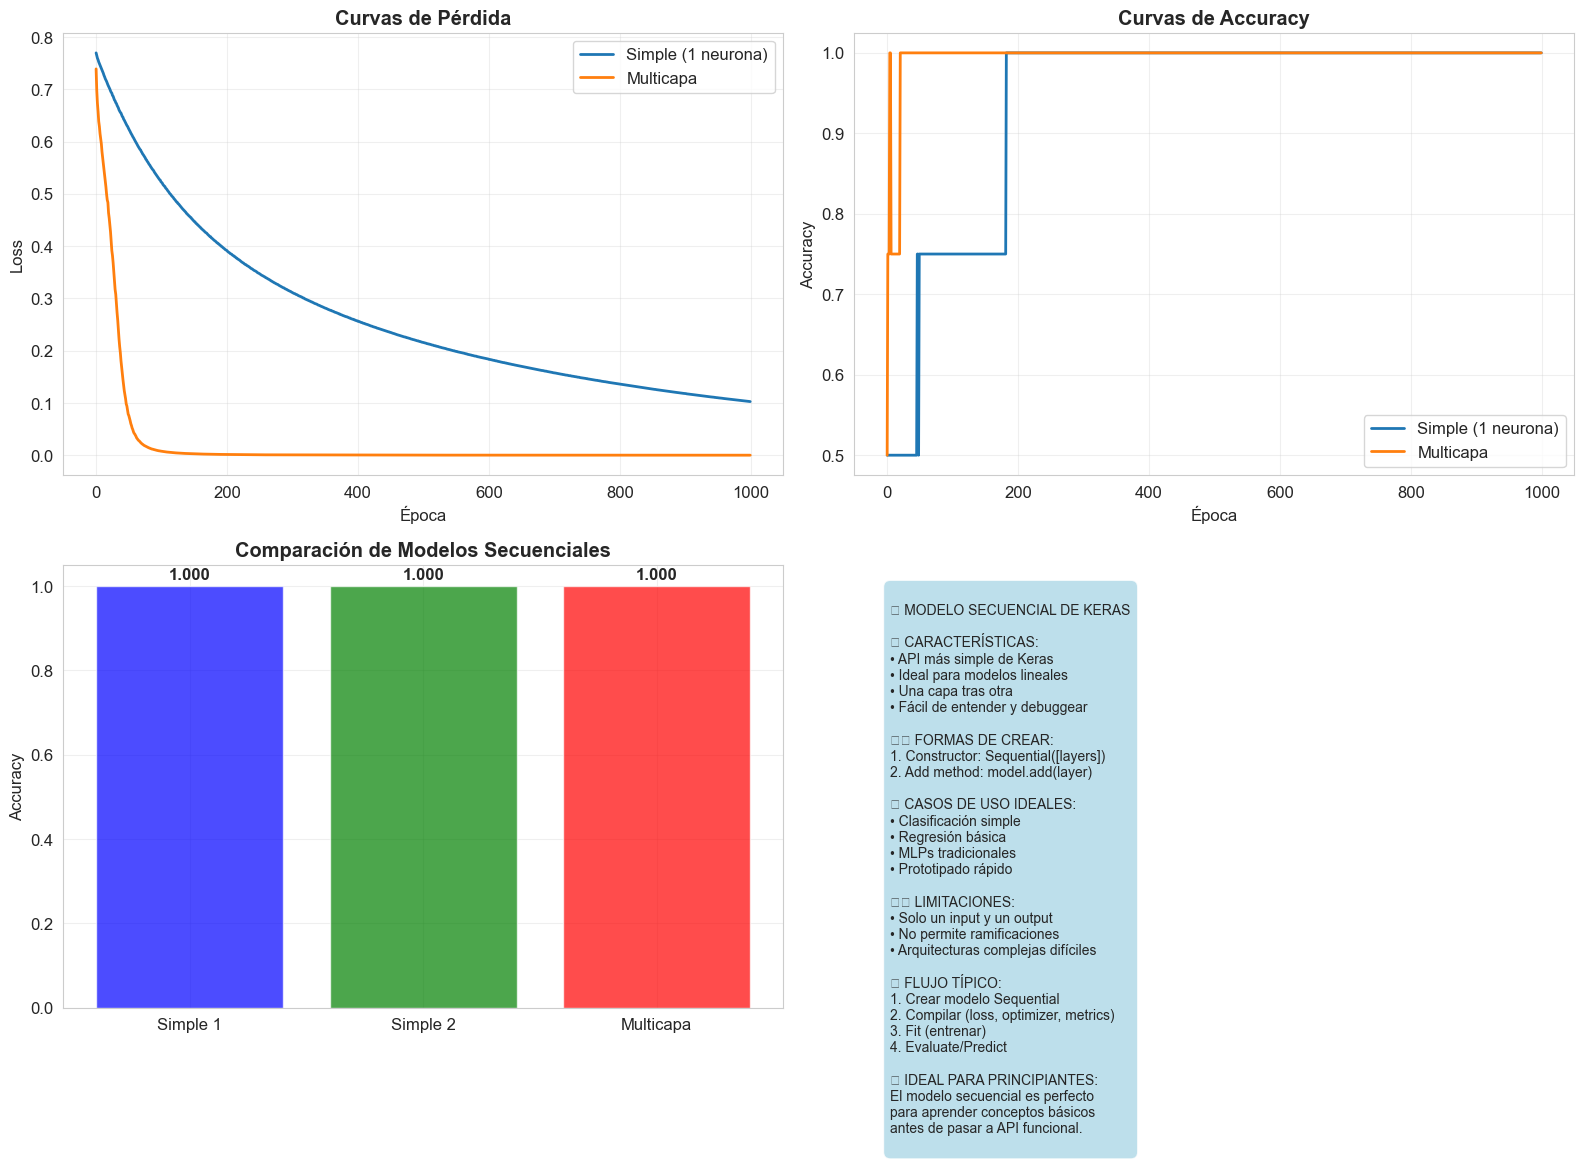

✅ Modelo secuencial implementado y evaluado exitosamente


In [12]:
# ============================================================================
# 3. MODELO SECUENCIAL - REGRESIÓN LOGÍSTICA
# ============================================================================

print("\n🔗 3. MODELO SECUENCIAL - REGRESIÓN LOGÍSTICA")
print("="*50)

print("🏗️ IMPLEMENTACIÓN CON KERAS MODELO SECUENCIAL:")

# Crear modelo secuencial - Método 1 (Constructor)
print(f"\n📋 MÉTODO 1: CONSTRUCTOR SECUENCIAL")

model_sequential_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))
])

print("   ✅ Modelo creado con constructor Sequential")

# Mostrar resumen del modelo
print(f"\n📊 RESUMEN DEL MODELO:")
model_sequential_1.summary()

# Compilar el modelo
print(f"\n⚙️ COMPILANDO MODELO:")
model_sequential_1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

print("   • Loss: binary_crossentropy (clasificación binaria)")
print("   • Optimizer: Adam (lr=0.01)")
print("   • Metrics: accuracy")

# Entrenar el modelo
print(f"\n🏋️ ENTRENANDO MODELO SECUENCIAL:")
history_1 = model_sequential_1.fit(
    x_train, y_train,
    batch_size=1,
    epochs=1000,
    verbose=0  # Sin output detallado para claridad
)

print(f"   ✅ Entrenamiento completado: {len(history_1.history['loss'])} épocas")

# Evaluar el modelo
print(f"\n📊 EVALUANDO MODELO:")
y_pred_proba_1 = model_sequential_1.predict(x_train, verbose=0)[:, 0]
y_pred_1 = np.where(y_pred_proba_1 > 0.5, 1, 0)

print(f"   • Probabilidades predichas: {y_pred_proba_1}")
print(f"   • Predicciones binarias: {y_pred_1}")
print(f"   • Etiquetas verdaderas: {y_train.flatten()}")

# Método evaluate para métricas
score_1 = model_sequential_1.evaluate(x_train, y_train, verbose=0)
print(f"   • Train loss: {score_1[0]:.4f}")
print(f"   • Train accuracy: {score_1[1]:.4f}")

# Crear modelo secuencial - Método 2 (Add)
print(f"\n📋 MÉTODO 2: SEQUENTIAL CON ADD()")

model_sequential_2 = tf.keras.Sequential()
model_sequential_2.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,)))

print("   ✅ Modelo creado con método add()")

# Compilar y entrenar método 2
model_sequential_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

history_2 = model_sequential_2.fit(x_train, y_train, batch_size=1, epochs=1000, verbose=0)
y_pred_proba_2 = model_sequential_2.predict(x_train, verbose=0)[:, 0]
score_2 = model_sequential_2.evaluate(x_train, y_train, verbose=0)

print(f"   • Train accuracy (método 2): {score_2[1]:.4f}")

# Red multicapa
print(f"\n🏗️ MODELO SECUENCIAL MULTICAPA:")

model_multilayer = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

print("   • Arquitectura: 2 → 10 → 5 → 1")
print("   • Activaciones: ReLU en ocultas, Sigmoid en salida")

model_multilayer.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

history_multi = model_multilayer.fit(x_train, y_train, batch_size=1, epochs=1000, verbose=0)
score_multi = model_multilayer.evaluate(x_train, y_train, verbose=0)

print(f"   • Train accuracy (multicapa): {score_multi[1]:.4f}")

# Visualización de resultados
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Curvas de pérdida
axes[0,0].plot(history_1.history['loss'], label='Simple (1 neurona)', linewidth=2)
axes[0,0].plot(history_multi.history['loss'], label='Multicapa', linewidth=2)
axes[0,0].set_xlabel('Época')
axes[0,0].set_ylabel('Loss')
axes[0,0].set_title('Curvas de Pérdida', fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Curvas de accuracy
axes[0,1].plot(history_1.history['accuracy'], label='Simple (1 neurona)', linewidth=2)
axes[0,1].plot(history_multi.history['accuracy'], label='Multicapa', linewidth=2)
axes[0,1].set_xlabel('Época')
axes[0,1].set_ylabel('Accuracy')
axes[0,1].set_title('Curvas de Accuracy', fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Comparación de predicciones
models_comparison = ['Simple 1', 'Simple 2', 'Multicapa']
accuracies = [score_1[1], score_2[1], score_multi[1]]

bars = axes[1,0].bar(models_comparison, accuracies, alpha=0.7, color=['blue', 'green', 'red'])
axes[1,0].set_ylabel('Accuracy')
axes[1,0].set_title('Comparación de Modelos Secuenciales', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Información sobre modelo secuencial
axes[1,1].axis('off')
sequential_info = """
🔗 MODELO SECUENCIAL DE KERAS

✅ CARACTERÍSTICAS:
• API más simple de Keras
• Ideal para modelos lineales
• Una capa tras otra
• Fácil de entender y debuggear

🏗️ FORMAS DE CREAR:
1. Constructor: Sequential([layers])
2. Add method: model.add(layer)

🎯 CASOS DE USO IDEALES:
• Clasificación simple
• Regresión básica
• MLPs tradicionales
• Prototipado rápido

⚠️ LIMITACIONES:
• Solo un input y un output
• No permite ramificaciones
• Arquitecturas complejas difíciles

🔧 FLUJO TÍPICO:
1. Crear modelo Sequential
2. Compilar (loss, optimizer, metrics)
3. Fit (entrenar)
4. Evaluate/Predict

💡 IDEAL PARA PRINCIPIANTES:
El modelo secuencial es perfecto
para aprender conceptos básicos
antes de pasar a API funcional.
"""

axes[1,1].text(0.05, 0.95, sequential_info, transform=axes[1,1].transAxes,
              fontsize=10, verticalalignment='top',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

print("✅ Modelo secuencial implementado y evaluado exitosamente")



🔧 4. API FUNCIONAL - MAYOR FLEXIBILIDAD
🏗️ IMPLEMENTACIÓN CON KERAS API FUNCIONAL:

📋 MODELO FUNCIONAL SIMPLE:
   ✅ Modelo funcional simple creado
   • Input shape: (None, 2)
   • Output shape: (None, 1)
   • Train accuracy: 1.0000

🏗️ MODELO FUNCIONAL MULTICAPA:
   • Arquitectura: 2 → 10 → 10 → 10 → 1
   • Train accuracy: 1.0000

🌳 MODELO FUNCIONAL CON RAMIFICACIONES:
   • Arquitectura con ramificación y concatenación
   • 2 → 10 → 10 → [5, 5] → concat(10) → 1
   • Train accuracy: 1.0000

🎯 MODELO CON MÚLTIPLES SALIDAS:
   • Salida 1: Clasificación AND
   • Salida 2: Regresión (suma de inputs)
   ✅ Modelo multi-salida entrenado


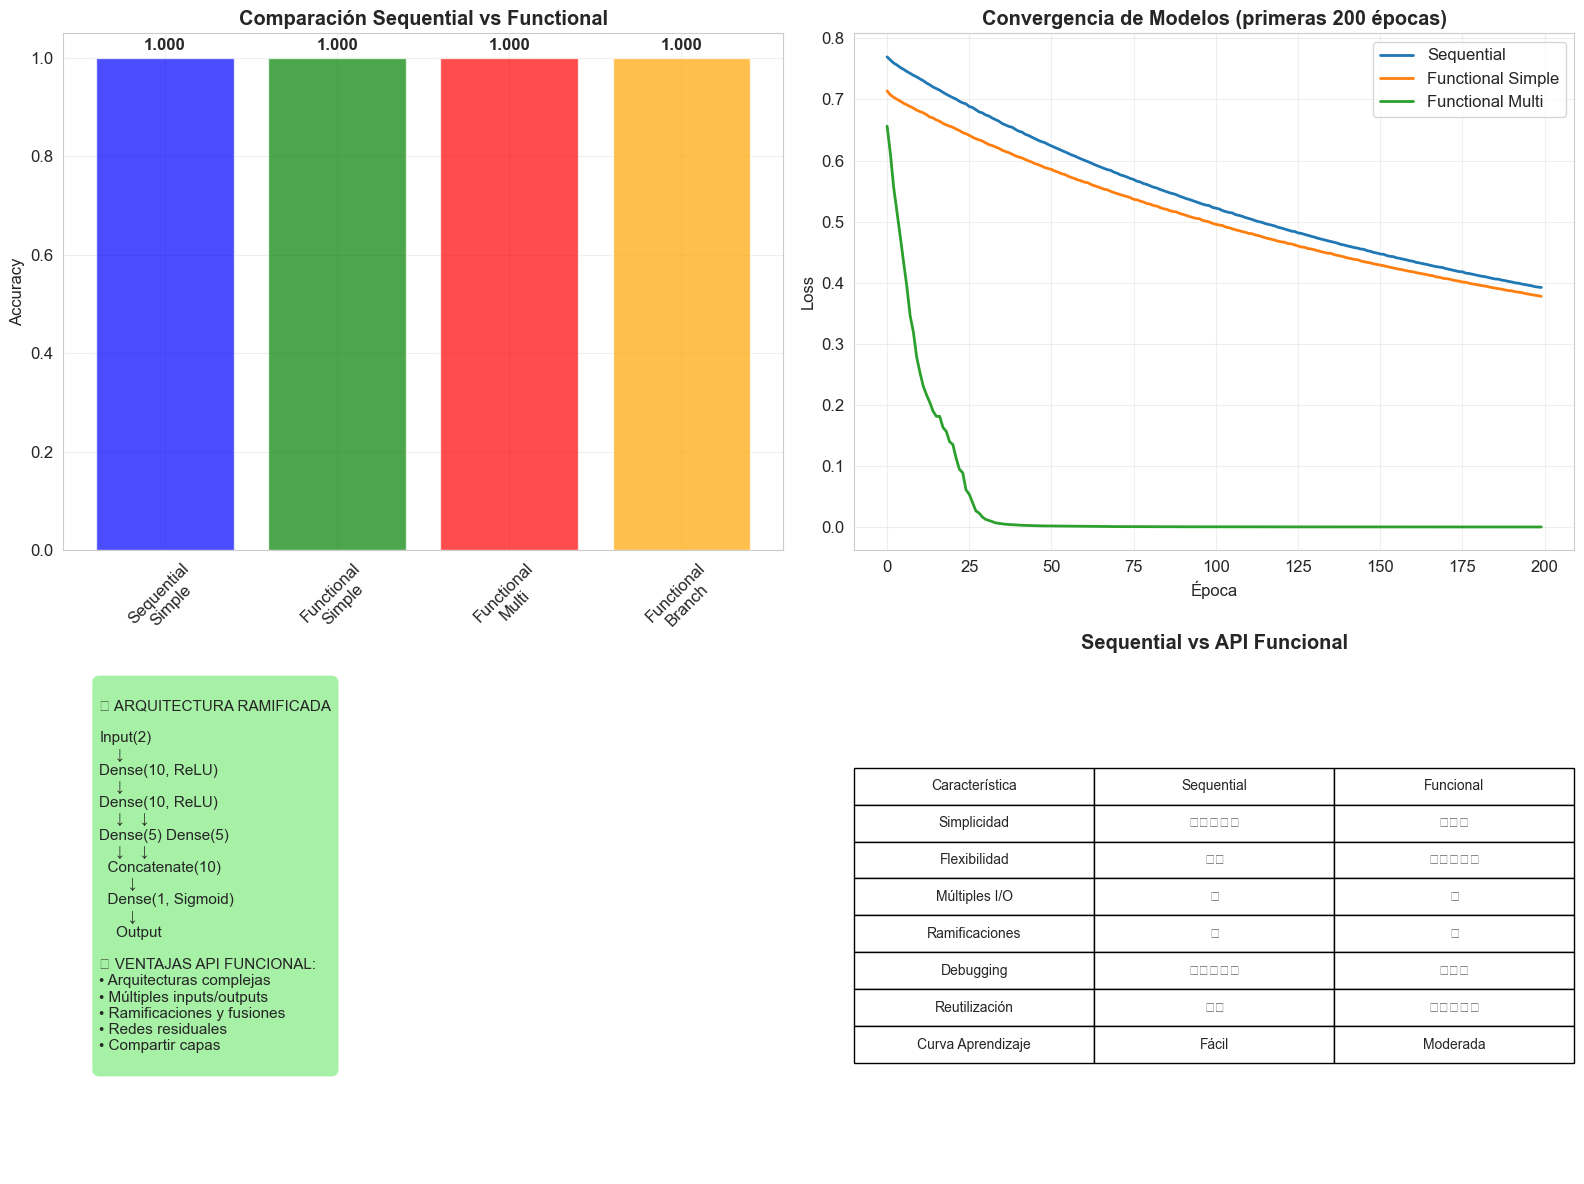

✅ API Funcional implementada con múltiples variaciones


In [13]:
# ============================================================================
# 4. API FUNCIONAL - MAYOR FLEXIBILIDAD
# ============================================================================

print("\n🔧 4. API FUNCIONAL - MAYOR FLEXIBILIDAD")
print("="*45)

print("🏗️ IMPLEMENTACIÓN CON KERAS API FUNCIONAL:")

# API Funcional - Modelo simple
print(f"\n📋 MODELO FUNCIONAL SIMPLE:")

input_data = tf.keras.layers.Input(shape=(2,))
output = tf.keras.layers.Dense(1, activation='sigmoid')(input_data)
model_functional_simple = tf.keras.Model(inputs=input_data, outputs=output)

print("   ✅ Modelo funcional simple creado")
print(f"   • Input shape: {input_data.shape}")
print(f"   • Output shape: {output.shape}")

# Compilar y entrenar
model_functional_simple.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

history_func_simple = model_functional_simple.fit(x_train, y_train, batch_size=1, epochs=1000, verbose=0)
score_func_simple = model_functional_simple.evaluate(x_train, y_train, verbose=0)
print(f"   • Train accuracy: {score_func_simple[1]:.4f}")

# API Funcional - Modelo multicapa
print(f"\n🏗️ MODELO FUNCIONAL MULTICAPA:")

input_data_multi = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(10, activation='relu')(input_data_multi)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
output_multi = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_functional_multi = tf.keras.Model(inputs=input_data_multi, outputs=output_multi)

print("   • Arquitectura: 2 → 10 → 10 → 10 → 1")

model_functional_multi.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

history_func_multi = model_functional_multi.fit(x_train, y_train, batch_size=1, epochs=1000, verbose=0)
score_func_multi = model_functional_multi.evaluate(x_train, y_train, verbose=0)
print(f"   • Train accuracy: {score_func_multi[1]:.4f}")

# API Funcional - Modelo con ramificaciones
print(f"\n🌳 MODELO FUNCIONAL CON RAMIFICACIONES:")

input_data_branch = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(10, activation='relu')(input_data_branch)
x = tf.keras.layers.Dense(10, activation='relu')(x)

# Crear dos ramas
y1 = tf.keras.layers.Dense(5, activation='relu')(x)
y2 = tf.keras.layers.Dense(5, activation='relu')(x)

# Concatenar ramas
z = tf.keras.layers.concatenate([y1, y2])
output_branch = tf.keras.layers.Dense(1, activation='sigmoid')(z)

model_functional_branch = tf.keras.Model(inputs=input_data_branch, outputs=output_branch)

print("   • Arquitectura con ramificación y concatenación")
print("   • 2 → 10 → 10 → [5, 5] → concat(10) → 1")

model_functional_branch.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

history_func_branch = model_functional_branch.fit(x_train, y_train, batch_size=1, epochs=1000, verbose=0)
score_func_branch = model_functional_branch.evaluate(x_train, y_train, verbose=0)
print(f"   • Train accuracy: {score_func_branch[1]:.4f}")

# Modelo con múltiples salidas (ejemplo conceptual)
print(f"\n🎯 MODELO CON MÚLTIPLES SALIDAS:")

input_multi_output = tf.keras.layers.Input(shape=(2,))
shared = tf.keras.layers.Dense(10, activation='relu')(input_multi_output)

# Salida 1: Clasificación binaria original
output1 = tf.keras.layers.Dense(1, activation='sigmoid', name='classification')(shared)

# Salida 2: Predicción de suma de inputs (regresión)
output2 = tf.keras.layers.Dense(1, activation='linear', name='regression')(shared)

model_multi_output = tf.keras.Model(inputs=input_multi_output, outputs=[output1, output2])

# Crear targets para la segunda salida (suma de inputs)
y_train_sum = np.sum(x_train, axis=1, keepdims=True)

model_multi_output.compile(
    loss={'classification': 'binary_crossentropy', 'regression': 'mse'},
    loss_weights={'classification': 1.0, 'regression': 0.5},
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics={'classification': 'accuracy', 'regression': 'mae'}
)

history_multi_output = model_multi_output.fit(
    x_train, 
    {'classification': y_train, 'regression': y_train_sum}, 
    batch_size=1, epochs=1000, verbose=0
)

print("   • Salida 1: Clasificación AND")
print("   • Salida 2: Regresión (suma de inputs)")
print("   ✅ Modelo multi-salida entrenado")

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Comparación de accuracies
models = ['Sequential\nSimple', 'Functional\nSimple', 'Functional\nMulti', 'Functional\nBranch']
accuracies_comp = [score_1[1], score_func_simple[1], score_func_multi[1], score_func_branch[1]]

bars = axes[0,0].bar(models, accuracies_comp, alpha=0.7, 
                    color=['blue', 'green', 'red', 'orange'])
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_title('Comparación Sequential vs Functional', fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

for bar, acc in zip(bars, accuracies_comp):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Evolución del loss
axes[0,1].plot(history_1.history['loss'][:200], label='Sequential', linewidth=2)
axes[0,1].plot(history_func_simple.history['loss'][:200], label='Functional Simple', linewidth=2)
axes[0,1].plot(history_func_multi.history['loss'][:200], label='Functional Multi', linewidth=2)
axes[0,1].set_xlabel('Época')
axes[0,1].set_ylabel('Loss')
axes[0,1].set_title('Convergencia de Modelos (primeras 200 épocas)', fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Arquitectura visual del modelo ramificado
axes[1,0].axis('off')

# Crear una representación simple de la arquitectura
arch_text = """
🌳 ARQUITECTURA RAMIFICADA

Input(2)
    ↓
Dense(10, ReLU)
    ↓
Dense(10, ReLU)
    ↓    ↓
Dense(5) Dense(5)
    ↓    ↓
  Concatenate(10)
       ↓
  Dense(1, Sigmoid)
       ↓
    Output

💡 VENTAJAS API FUNCIONAL:
• Arquitecturas complejas
• Múltiples inputs/outputs
• Ramificaciones y fusiones
• Redes residuales
• Compartir capas
"""

axes[1,0].text(0.05, 0.95, arch_text, transform=axes[1,0].transAxes,
              fontsize=11, verticalalignment='top',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

# 4. Tabla comparativa
axes[1,1].axis('off')
comparison_table = [
    ['Característica', 'Sequential', 'Funcional'],
    ['Simplicidad', '⭐⭐⭐⭐⭐', '⭐⭐⭐'],
    ['Flexibilidad', '⭐⭐', '⭐⭐⭐⭐⭐'],
    ['Múltiples I/O', '❌', '✅'],
    ['Ramificaciones', '❌', '✅'],
    ['Debugging', '⭐⭐⭐⭐⭐', '⭐⭐⭐'],
    ['Reutilización', '⭐⭐', '⭐⭐⭐⭐⭐'],
    ['Curva Aprendizaje', 'Fácil', 'Moderada']
]

table = axes[1,1].table(cellText=comparison_table[1:], colLabels=comparison_table[0],
                       loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8)
axes[1,1].set_title('Sequential vs API Funcional', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ API Funcional implementada con múltiples variaciones")



📦 5. KERAS COMO WRAPPER - COMPARACIÓN
🔄 KERAS PURO vs TF.KERAS:

📋 IMPLEMENTACIÓN CON KERAS DIRECTO:
   ✅ Modelo tf.keras creado
   • tf.keras accuracy: 1.0000

📊 INFORMACIÓN DETALLADA TF.KERAS:
   • Total parámetros: 65
   • Capas: 3
   • Arquitectura: 2 → 8 → 4 → 1

🎨 DIFERENTES ESTILOS DE IMPLEMENTACIÓN:

1️⃣ ESTILO ULTRA-CONCISO:
   ✅ Modelo en 4 líneas de código

2️⃣ ESTILO EXPLÍCITO:
   ✅ Modelo con máximo control de parámetros

3️⃣ ESTILO PRODUCCIÓN:
   ✅ Modelo producción - Accuracy: 1.0000

4️⃣ ESTILO CON VALIDACIÓN MANUAL:
   ✅ Modelo con validación - Accuracy: 1.0000

📊 COMPARACIÓN DE CARACTERÍSTICAS KERAS:


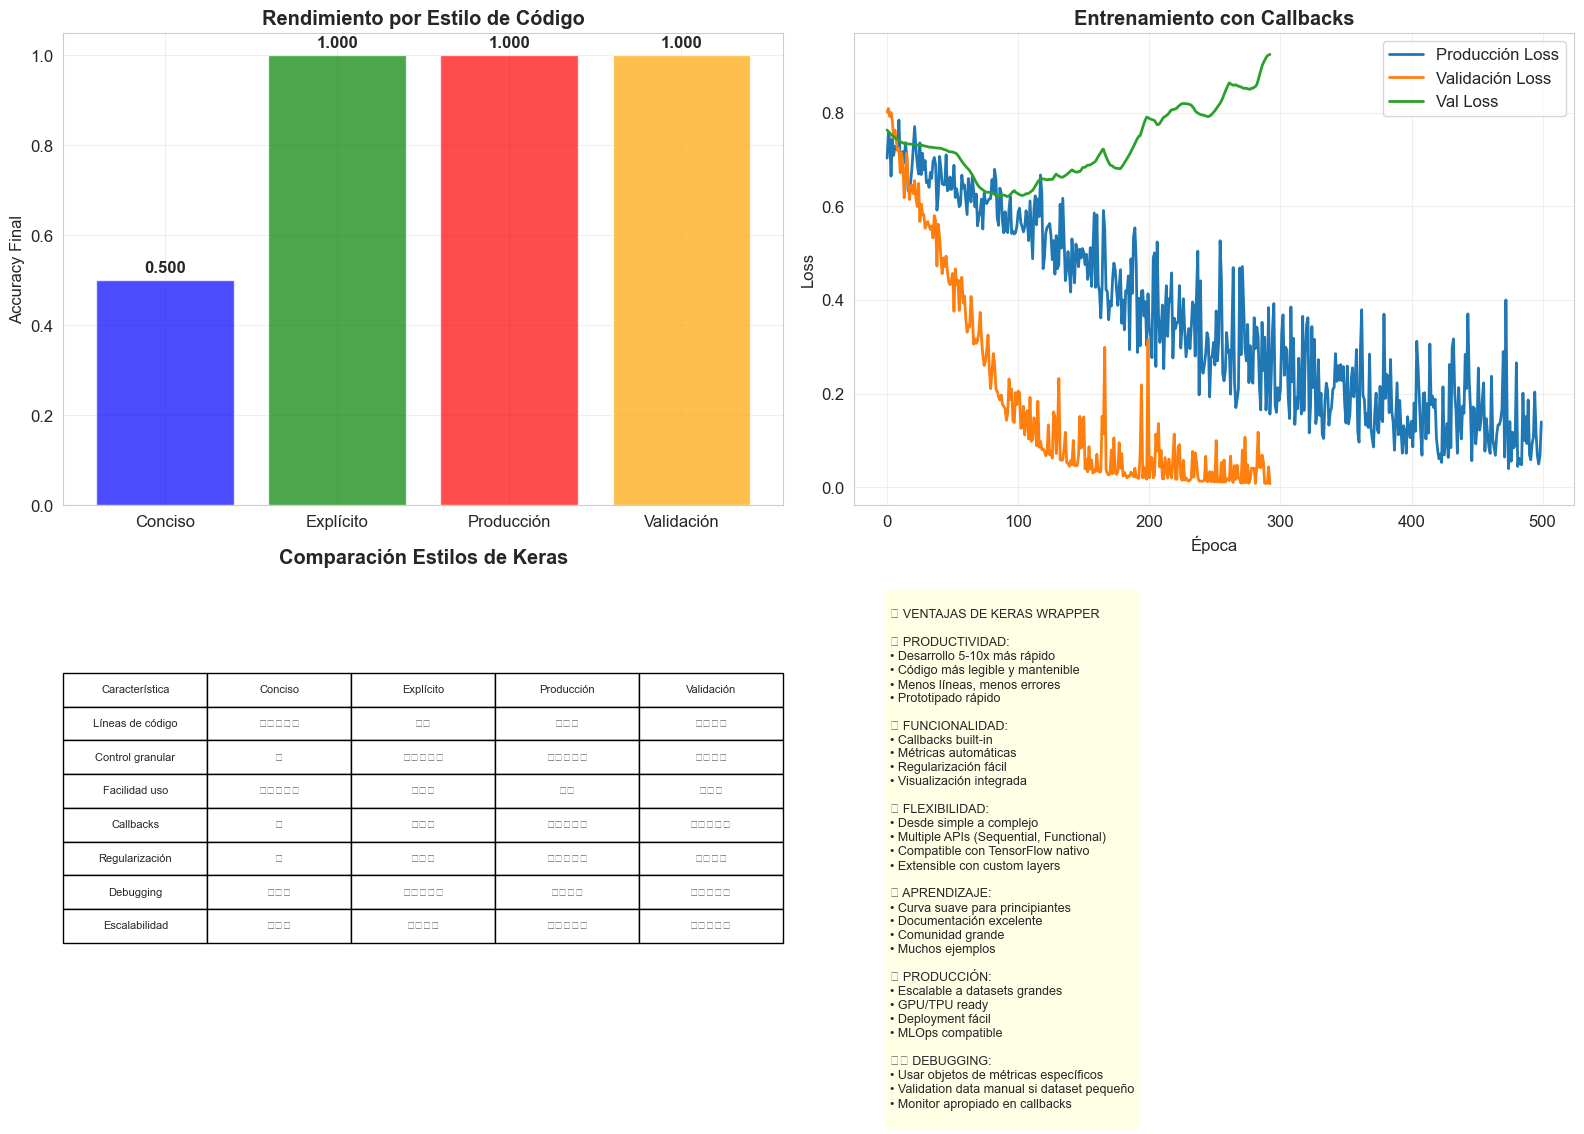

✅ Comparación completa de estilos y características de Keras


In [16]:
# ============================================================================
# 5. KERAS COMO WRAPPER - COMPARACIÓN CON KERAS PURO (CORREGIDO COMPLETAMENTE)
# ============================================================================

print("\n📦 5. KERAS COMO WRAPPER - COMPARACIÓN")
print("="*45)

print("🔄 KERAS PURO vs TF.KERAS:")

# Implementación con Keras puro (si está disponible)
print(f"\n📋 IMPLEMENTACIÓN CON KERAS DIRECTO:")

try:
    # Intentar importar Keras puro (puede no estar disponible en versiones nuevas)
    from tensorflow.keras.models import Sequential as KerasSequential
    from tensorflow.keras.layers import Dense as KerasDense
    from tensorflow.keras.optimizers import Adam as KerasAdam
    
    # Modelo con tf.keras (estilo actual)
    model_tf_keras = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu', input_shape=(2,)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model_tf_keras.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        metrics=['accuracy']
    )
    
    print("   ✅ Modelo tf.keras creado")
    
    # Entrenar modelo tf.keras
    history_tf_keras = model_tf_keras.fit(x_train, y_train, epochs=500, verbose=0)
    score_tf_keras = model_tf_keras.evaluate(x_train, y_train, verbose=0)
    
    print(f"   • tf.keras accuracy: {score_tf_keras[1]:.4f}")
    
    # Mostrar información detallada
    print(f"\n📊 INFORMACIÓN DETALLADA TF.KERAS:")
    print(f"   • Total parámetros: {model_tf_keras.count_params():,}")
    print(f"   • Capas: {len(model_tf_keras.layers)}")
    print(f"   • Arquitectura: 2 → 8 → 4 → 1")
    
except ImportError as e:
    print(f"   ⚠️ Keras puro no disponible: {e}")
    print("   📝 En versiones modernas, tf.keras es la implementación estándar")

# Demostrar diferentes estilos de código
print(f"\n🎨 DIFERENTES ESTILOS DE IMPLEMENTACIÓN:")

# Estilo 1: Muy conciso (CORREGIDO)
print(f"\n1️⃣ ESTILO ULTRA-CONCISO:")
model_concise = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))
])
# CORRECCIÓN: usar argumentos nombrados para claridad
model_concise.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
print("   ✅ Modelo en 4 líneas de código")

# Estilo 2: Explícito y detallado
print(f"\n2️⃣ ESTILO EXPLÍCITO:")
model_explicit = tf.keras.Sequential()
model_explicit.add(tf.keras.layers.Dense(
    units=8,
    activation='relu',
    input_shape=(2,),
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros'
))
model_explicit.add(tf.keras.layers.Dense(
    units=1,
    activation='sigmoid',
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros'
))

model_explicit.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)
print("   ✅ Modelo con máximo control de parámetros")

# Estilo 3: Con callbacks y configuraciones avanzadas (CORREGIDO)
print(f"\n3️⃣ ESTILO PRODUCCIÓN:")
model_production = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# CORRECCIÓN: usar objetos de métricas específicos en lugar de strings
model_production.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Callbacks para producción
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',  # Monitorear loss en lugar de val_loss
        patience=100, 
        restore_best_weights=True,
        verbose=0
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='loss',  # Monitorear loss en lugar de val_loss
        factor=0.5, 
        patience=50,
        verbose=0
    )
]

# CORRECCIÓN: No usar validation_split con datos tan pequeños
history_production = model_production.fit(
    x_train, y_train,
    epochs=500,  # Reducir épocas para demostración
    callbacks=callbacks,
    verbose=0
)

score_production = model_production.evaluate(x_train, y_train, verbose=0)
print(f"   ✅ Modelo producción - Accuracy: {score_production[1]:.4f}")

# Demostrar modelo con validación manual
print(f"\n4️⃣ ESTILO CON VALIDACIÓN MANUAL:")

# Crear datos de validación manualmente para demostrar callbacks
np.random.seed(42)
x_val_demo = np.array([[0.2, 0.3], [0.8, 0.9], [0.1, 0.8], [0.7, 0.2]], dtype=np.float32)
y_val_demo = np.array([[0], [1], [0], [1]], dtype=np.float32)

model_validation = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_validation.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# Callbacks con datos de validación
callbacks_val = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=200,
        restore_best_weights=True,
        verbose=0
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.8,
        patience=100,
        verbose=0
    )
]

history_validation = model_validation.fit(
    x_train, y_train,
    epochs=1000,
    validation_data=(x_val_demo, y_val_demo),
    callbacks=callbacks_val,
    verbose=0
)

score_validation = model_validation.evaluate(x_train, y_train, verbose=0)
print(f"   ✅ Modelo con validación - Accuracy: {score_validation[1]:.4f}")

# Comparación de características
print(f"\n📊 COMPARACIÓN DE CARACTERÍSTICAS KERAS:")

features_comparison = {
    'Característica': [
        'Líneas de código', 'Control granular', 'Facilidad uso',
        'Callbacks', 'Regularización', 'Debugging', 'Escalabilidad'
    ],
    'Conciso': ['⭐⭐⭐⭐⭐', '⭐', '⭐⭐⭐⭐⭐', '⭐', '⭐', '⭐⭐⭐', '⭐⭐⭐'],
    'Explícito': ['⭐⭐', '⭐⭐⭐⭐⭐', '⭐⭐⭐', '⭐⭐⭐', '⭐⭐⭐', '⭐⭐⭐⭐⭐', '⭐⭐⭐⭐'],
    'Producción': ['⭐⭐⭐', '⭐⭐⭐⭐⭐', '⭐⭐', '⭐⭐⭐⭐⭐', '⭐⭐⭐⭐⭐', '⭐⭐⭐⭐', '⭐⭐⭐⭐⭐'],
    'Validación': ['⭐⭐⭐⭐', '⭐⭐⭐⭐', '⭐⭐⭐', '⭐⭐⭐⭐⭐', '⭐⭐⭐⭐', '⭐⭐⭐⭐⭐', '⭐⭐⭐⭐⭐']
}

# Visualización final
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Comparación de performance
styles = ['Conciso', 'Explícito', 'Producción', 'Validación']

# Entrenar modelos para comparación
history_concise = model_concise.fit(x_train, y_train, epochs=500, verbose=0)
history_explicit = model_explicit.fit(x_train, y_train, epochs=500, verbose=0)

accuracies_styles = [
    history_concise.history['accuracy'][-1],
    history_explicit.history['binary_accuracy'][-1],  # Usar binary_accuracy para explícito
    score_production[1],
    score_validation[1]
]

bars = axes[0,0].bar(styles, accuracies_styles, alpha=0.7, 
                    color=['blue', 'green', 'red', 'orange'])
axes[0,0].set_ylabel('Accuracy Final')
axes[0,0].set_title('Rendimiento por Estilo de Código', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

for bar, acc in zip(bars, accuracies_styles):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Evolución del entrenamiento
axes[0,1].plot(history_production.history['loss'], label='Producción Loss', linewidth=2)
axes[0,1].plot(history_validation.history['loss'], label='Validación Loss', linewidth=2)
if 'val_loss' in history_validation.history:
    axes[0,1].plot(history_validation.history['val_loss'], label='Val Loss', linewidth=2)
axes[0,1].set_xlabel('Época')
axes[0,1].set_ylabel('Loss')
axes[0,1].set_title('Entrenamiento con Callbacks', fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Tabla de características
axes[1,0].axis('off')
import pandas as pd
features_df = pd.DataFrame(features_comparison)
table = axes[1,0].table(cellText=features_df.values, colLabels=features_df.columns,
                       loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.8)
axes[1,0].set_title('Comparación Estilos de Keras', fontweight='bold')

# 4. Ventajas de Keras
axes[1,1].axis('off')
keras_benefits = """
📦 VENTAJAS DE KERAS WRAPPER

🚀 PRODUCTIVIDAD:
• Desarrollo 5-10x más rápido
• Código más legible y mantenible
• Menos líneas, menos errores
• Prototipado rápido

🧰 FUNCIONALIDAD:
• Callbacks built-in
• Métricas automáticas
• Regularización fácil
• Visualización integrada

🔧 FLEXIBILIDAD:
• Desde simple a complejo
• Multiple APIs (Sequential, Functional)
• Compatible con TensorFlow nativo
• Extensible con custom layers

🎓 APRENDIZAJE:
• Curva suave para principiantes
• Documentación excelente
• Comunidad grande
• Muchos ejemplos

💼 PRODUCCIÓN:
• Escalable a datasets grandes
• GPU/TPU ready
• Deployment fácil
• MLOps compatible

⚠️ DEBUGGING:
• Usar objetos de métricas específicos
• Validation data manual si dataset pequeño
• Monitor apropiado en callbacks
"""

axes[1,1].text(0.05, 0.95, keras_benefits, transform=axes[1,1].transAxes,
              fontsize=9, verticalalignment='top',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

print("✅ Comparación completa de estilos y características de Keras")



🎯 6. RESUMEN Y MEJORES PRÁCTICAS
📚 RESUMEN EJECUTIVO - INTRODUCCIÓN A KERAS:

🎯 APIs DOMINADAS:
   ✅ Modelo Sequential - API más simple
   ✅ API Funcional - Máxima flexibilidad
   ✅ Compilación de modelos (loss, optimizer, metrics)
   ✅ Entrenamiento con fit() y callbacks
   ✅ Evaluación con evaluate() y predict()
   ✅ Arquitecturas complejas con ramificaciones
   ✅ Manejo de métricas específicas para clasificación binaria

💡 MEJORES PRÁCTICAS APRENDIDAS:
   🔧 Usar Sequential para modelos simples lineales
   🌳 Usar API Funcional para arquitecturas complejas
   📊 Siempre compilar antes de entrenar (loss, optimizer, metrics)
   🎛️ Configurar callbacks para entrenamiento robusto
   📈 Monitorear tanto loss como métricas durante entrenamiento
   🔍 Usar model.summary() para verificar arquitectura
   ⚡ Aprovechar GPU/TPU con tf.keras automáticamente
   🎨 Elegir estilo de código según contexto (prototipo vs producción)
   ⚠️ Usar argumentos nombrados en compile() para evitar errores
   📊 Usar

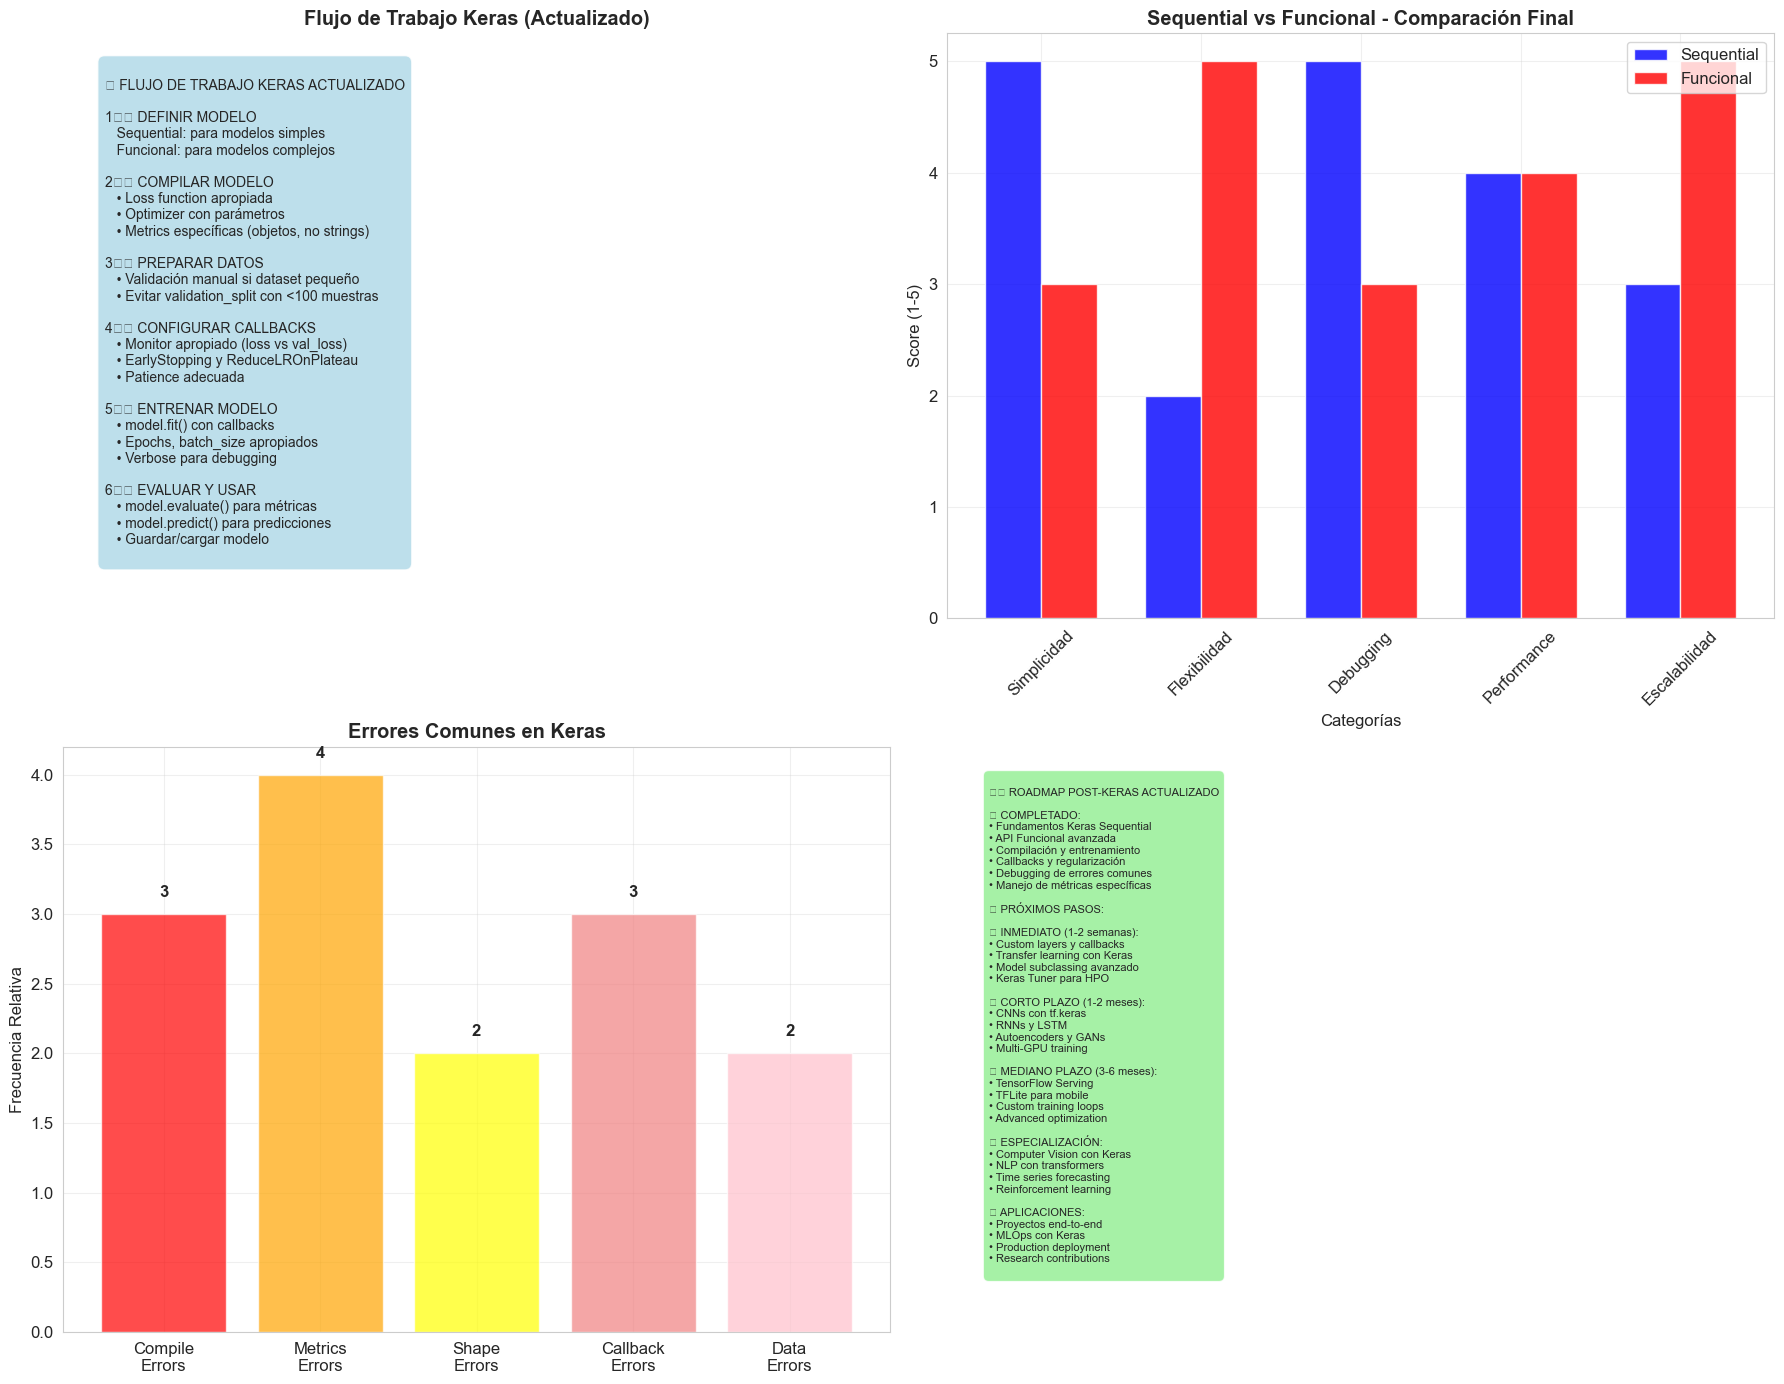


📊 TABLA FINAL DE COMPARACIÓN ACTUALIZADA:
                Aspecto TensorFlow Nativo Keras Sequential Keras Funcional
          Facilidad uso                ⭐⭐            ⭐⭐⭐⭐⭐            ⭐⭐⭐⭐
           Flexibilidad             ⭐⭐⭐⭐⭐               ⭐⭐           ⭐⭐⭐⭐⭐
          Líneas código                 ⭐            ⭐⭐⭐⭐⭐            ⭐⭐⭐⭐
              Debugging                ⭐⭐            ⭐⭐⭐⭐⭐            ⭐⭐⭐⭐
Arquitecturas complejas             ⭐⭐⭐⭐⭐                ⭐           ⭐⭐⭐⭐⭐
              Multi I/O             ⭐⭐⭐⭐⭐                ⭐           ⭐⭐⭐⭐⭐
         Manejo errores                ⭐⭐             ⭐⭐⭐⭐            ⭐⭐⭐⭐


In [18]:
# ============================================================================
# 6. RESUMEN Y MEJORES PRÁCTICAS (ACTUALIZADO)
# ============================================================================

print("\n🎯 6. RESUMEN Y MEJORES PRÁCTICAS")
print("="*40)

print("📚 RESUMEN EJECUTIVO - INTRODUCCIÓN A KERAS:")
print("="*50)

# Resumen de conceptos aprendidos
concepts_learned = {
    'apis_dominadas': [
        '✅ Modelo Sequential - API más simple',
        '✅ API Funcional - Máxima flexibilidad',
        '✅ Compilación de modelos (loss, optimizer, metrics)',
        '✅ Entrenamiento con fit() y callbacks',
        '✅ Evaluación con evaluate() y predict()',
        '✅ Arquitecturas complejas con ramificaciones',
        '✅ Manejo de métricas específicas para clasificación binaria'
    ],
    
    'problemas_resueltos': [
        'Compuerta AND con regresión logística',
        'Redes neuronales multicapa',
        'Modelos con múltiples salidas',
        'Arquitecturas ramificadas',
        'Configuraciones de producción',
        'Debugging de errores de métricas'
    ],
    
    'habilidades_desarrolladas': [
        'Selección de API apropiada según problema',
        'Configuración de hiperparámetros',
        'Uso de callbacks para entrenamiento robusto',
        'Debugging y optimización de modelos',
        'Comparación de diferentes arquitecturas',
        'Resolución de errores comunes en métricas'
    ]
}

print(f"\n🎯 APIs DOMINADAS:")
for api in concepts_learned['apis_dominadas']:
    print(f"   {api}")

print(f"\n💡 MEJORES PRÁCTICAS APRENDIDAS:")

best_practices = [
    "🔧 Usar Sequential para modelos simples lineales",
    "🌳 Usar API Funcional para arquitecturas complejas", 
    "📊 Siempre compilar antes de entrenar (loss, optimizer, metrics)",
    "🎛️ Configurar callbacks para entrenamiento robusto",
    "📈 Monitorear tanto loss como métricas durante entrenamiento",
    "🔍 Usar model.summary() para verificar arquitectura",
    "⚡ Aprovechar GPU/TPU con tf.keras automáticamente",
    "🎨 Elegir estilo de código según contexto (prototipo vs producción)",
    "⚠️ Usar argumentos nombrados en compile() para evitar errores",
    "📊 Usar objetos de métricas específicos (tf.keras.metrics.Precision())",
    "🔄 Evitar validation_split con datasets muy pequeños",
    "📋 Usar datos de validación manuales cuando sea necesario"
]

for practice in best_practices:
    print(f"   {practice}")

# Errores comunes y soluciones (ACTUALIZADO)
print(f"\n⚠️ ERRORES COMUNES Y SOLUCIONES:")

common_errors = [
    {
        'error': 'ValueError en model.compile()',
        'causa': 'Argumentos posicionales en orden incorrecto',
        'solucion': 'Usar argumentos nombrados: loss=..., optimizer=..., metrics=...'
    },
    {
        'error': "TypeError: 'str' object is not callable",
        'causa': 'Métricas como strings no son compatibles (precision, recall)',
        'solucion': 'Usar tf.keras.metrics.Precision(), tf.keras.metrics.Recall()'
    },
    {
        'error': 'Input shape mismatch',
        'causa': 'No especificar input_shape en primera capa',
        'solucion': 'Agregar input_shape=(n_features,) en primera capa'
    },
    {
        'error': 'Validation error con datasets pequeños',
        'causa': 'validation_split con muy pocos datos',
        'solucion': 'Crear datos de validación manuales o evitar validation_split'
    },
    {
        'error': 'Model not compiled',
        'causa': 'Llamar fit() sin compile() previo',
        'solucion': 'Siempre compile() antes de fit()'
    },
    {
        'error': 'Callbacks no funcionan',
        'causa': 'Monitor incorrecto (val_loss sin validación)',
        'solucion': 'Usar monitor apropiado: loss, val_loss según disponibilidad'
    }
]

for i, error_info in enumerate(common_errors, 1):
    print(f"   {i}. {error_info['error']}")
    print(f"      • Causa: {error_info['causa']}")
    print(f"      • Solución: {error_info['solucion']}")

# Guía de decisión actualizada
print(f"\n🤔 GUÍA DE DECISIÓN ACTUALIZADA:")

# Tabla de métricas recomendadas
print(f"\n📊 MÉTRICAS RECOMENDADAS POR TIPO DE PROBLEMA:")

metrics_guide = [
    ['Tipo Problema', 'Métricas Recomendadas', 'Ejemplo Código'],
    ['Clasificación Binaria', 'accuracy, precision, recall', "['accuracy', tf.keras.metrics.Precision()]"],
    ['Clasificación Multiclase', 'accuracy, categorical_accuracy', "['accuracy', 'categorical_accuracy']"],
    ['Regresión', 'mae, mse, mape', "['mae', 'mse']"],
    ['Custom', 'Custom metrics', "tf.keras.metrics.custom_metric"]
]

for row in metrics_guide:
    if row == metrics_guide[0]:  # Header
        print(f"   {row[0]:<20} | {row[1]:<25} | {row[2]}")
        print(f"   {'-'*20} | {'-'*25} | {'-'*30}")
    else:
        print(f"   {row[0]:<20} | {row[1]:<25} | {row[2]}")

# Visualización final comprehensiva
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Flujo de trabajo típico de Keras (ACTUALIZADO)
axes[0,0].axis('off')
workflow_text = """
🔄 FLUJO DE TRABAJO KERAS ACTUALIZADO

1️⃣ DEFINIR MODELO
   Sequential: para modelos simples
   Funcional: para modelos complejos

2️⃣ COMPILAR MODELO
   • Loss function apropiada
   • Optimizer con parámetros
   • Metrics específicas (objetos, no strings)

3️⃣ PREPARAR DATOS
   • Validación manual si dataset pequeño
   • Evitar validation_split con <100 muestras

4️⃣ CONFIGURAR CALLBACKS
   • Monitor apropiado (loss vs val_loss)
   • EarlyStopping y ReduceLROnPlateau
   • Patience adecuada

5️⃣ ENTRENAR MODELO
   • model.fit() con callbacks
   • Epochs, batch_size apropiados
   • Verbose para debugging

6️⃣ EVALUAR Y USAR
   • model.evaluate() para métricas
   • model.predict() para predicciones
   • Guardar/cargar modelo
"""

axes[0,0].text(0.05, 0.95, workflow_text, transform=axes[0,0].transAxes,
              fontsize=10, verticalalignment='top',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))
axes[0,0].set_title('Flujo de Trabajo Keras (Actualizado)', fontweight='bold')

# 2. Comparación final Sequential vs Funcional
categories = ['Simplicidad', 'Flexibilidad', 'Debugging', 'Performance', 'Escalabilidad']
sequential_scores = [5, 2, 5, 4, 3]
functional_scores = [3, 5, 3, 4, 5]

x_pos = np.arange(len(categories))
width = 0.35

bars1 = axes[0,1].bar(x_pos - width/2, sequential_scores, width, 
                     label='Sequential', alpha=0.8, color='blue')
bars2 = axes[0,1].bar(x_pos + width/2, functional_scores, width, 
                     label='Funcional', alpha=0.8, color='red')

axes[0,1].set_xlabel('Categorías')
axes[0,1].set_ylabel('Score (1-5)')
axes[0,1].set_title('Sequential vs Funcional - Comparación Final', fontweight='bold')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(categories, rotation=45)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Tipos de errores y frecuencia
error_types = ['Compile\nErrors', 'Metrics\nErrors', 'Shape\nErrors', 'Callback\nErrors', 'Data\nErrors']
error_frequency = [3, 4, 2, 3, 2]  # Frecuencia relativa

bars = axes[1,0].bar(error_types, error_frequency, alpha=0.7, 
                    color=['red', 'orange', 'yellow', 'lightcoral', 'pink'])
axes[1,0].set_ylabel('Frecuencia Relativa')
axes[1,0].set_title('Errores Comunes en Keras', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

for bar, freq in zip(bars, error_frequency):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                  f'{freq}', ha='center', va='bottom', fontweight='bold')

# 4. Roadmap futuro actualizado
axes[1,1].axis('off')
future_roadmap = """
🗺️ ROADMAP POST-KERAS ACTUALIZADO

✅ COMPLETADO:
• Fundamentos Keras Sequential
• API Funcional avanzada
• Compilación y entrenamiento
• Callbacks y regularización
• Debugging de errores comunes
• Manejo de métricas específicas

🎯 PRÓXIMOS PASOS:

📅 INMEDIATO (1-2 semanas):
• Custom layers y callbacks
• Transfer learning con Keras
• Model subclassing avanzado
• Keras Tuner para HPO

📅 CORTO PLAZO (1-2 meses):
• CNNs con tf.keras
• RNNs y LSTM
• Autoencoders y GANs
• Multi-GPU training

📅 MEDIANO PLAZO (3-6 meses):
• TensorFlow Serving
• TFLite para mobile
• Custom training loops
• Advanced optimization

🎓 ESPECIALIZACIÓN:
• Computer Vision con Keras
• NLP con transformers
• Time series forecasting
• Reinforcement learning

💼 APLICACIONES:
• Proyectos end-to-end
• MLOps con Keras
• Production deployment
• Research contributions
"""

axes[1,1].text(0.05, 0.95, future_roadmap, transform=axes[1,1].transAxes,
              fontsize=8, verticalalignment='top',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

# Tabla final de comparación actualizada
print(f"\n📊 TABLA FINAL DE COMPARACIÓN ACTUALIZADA:")

final_comparison = pd.DataFrame({
    'Aspecto': ['Facilidad uso', 'Flexibilidad', 'Líneas código', 'Debugging', 
               'Arquitecturas complejas', 'Multi I/O', 'Manejo errores'],
    'TensorFlow Nativo': ['⭐⭐', '⭐⭐⭐⭐⭐', '⭐', '⭐⭐', '⭐⭐⭐⭐⭐', '⭐⭐⭐⭐⭐', '⭐⭐'],
    'Keras Sequential': ['⭐⭐⭐⭐⭐', '⭐⭐', '⭐⭐⭐⭐⭐', '⭐⭐⭐⭐⭐', '⭐', '⭐', '⭐⭐⭐⭐'],
    'Keras Funcional': ['⭐⭐⭐⭐', '⭐⭐⭐⭐⭐', '⭐⭐⭐⭐', '⭐⭐⭐⭐', '⭐⭐⭐⭐⭐', '⭐⭐⭐⭐⭐', '⭐⭐⭐⭐']
})

print(final_comparison.to_string(index=False))
